In [1]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

In [20]:
df = pd.read_csv("/content/drive/MyDrive/ICTAK/Wine.csv")
X = df.iloc[:,:]
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Using Elbow Method to find optimal number of clusters**

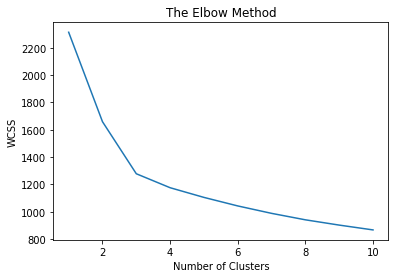

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, scalex=True)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans.fit_predict(X)

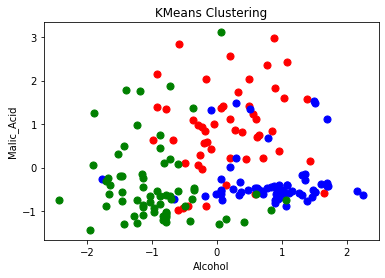

In [24]:
plt.scatter(X[y==0,0], X[y==0,1], c='red', s=50)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', s=50)
plt.scatter(X[y==2,0], X[y==2,1], c='green', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()

In [26]:
import plotly.express as px
clusters=pd.DataFrame(X,columns=df.columns)
clusters['label']=kmeans.labels_
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

**Using Dendrogram to find the optimal number of clusters**

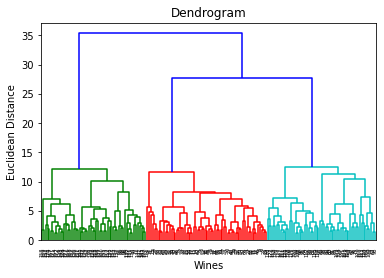

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean Distance')
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y = hc.fit_predict(X)

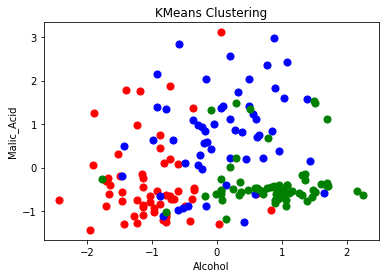

In [29]:
plt.scatter(X[y==0,0], X[y==0,1], c='red', s=50)
plt.scatter(X[y==1,0], X[y==1,1], c='blue', s=50)
plt.scatter(X[y==2,0], X[y==2,1], c='green', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.show()